In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

In [3]:

def diffrac(k,z, ratio, xy_range, XX, YY, U0):
    # Calculate rr
    rr = np.sqrt(XX**2 + YY**2 + z**2)
    # Calculate G
    G = 1 / (2 * np.pi) * np.exp(-1j * k * rr) / rr**2 * z * (1 / rr + 1j * k)
    # Create U0 with zeros
    U1 =  U0
    # Compute FFT of U0 and G
    fft_U1 = np.fft.fft2(U1)
    fft_G = np.fft.fft2(G)
    # Multiply FFT of U0 and G
    fft_U = fft_U1 * fft_G
    # Compute inverse FFT and shift
    U = np.fft.ifftshift(np.fft.ifft2(fft_U)) / ratio**2
    return U

def GS_steps(img_initial,U_0):
    img_input = np.fft.ifft2(np.fft.ifftshift(img_initial))
    phrase_input = np.angle(img_input)
    img_begin = U_0 * np.exp(1j * phrase_input)
    #img_pro = diffrac(k,z, ratio, xy_range, XX, YY, img_begin)
    img_output = np.fft.fftshift(np.fft.fft2(img_begin))
    return phrase_input, img_output

def img_sim(img1, img2):
    value_matrix = np.corrcoef(img1.flatten(), img2.flatten())
    value = np.min(value_matrix)
    return value

def img_normalization(img_input):
    img_abs = np.abs(img_input)
    img_output = img_abs / np.max(img_abs)
    return img_output

读取图片，图片大小为500*500

In [4]:
image_raw = Image.open('Original.jpg') #将图片改为黑白照
image_gray = image_raw.convert('L')
image_gray.save('Original_grey.jpg')
img_original = plt.imread('Original_grey.jpg').astype(float)
img_original = img_original / np.max(img_original)  # Normalize to [0, 1]
xy_range = img_original.shape[0]

(1)当全息片的像素单元尺寸为0.3μm*0.3μm时的位相分布,dx=dy=0.3,ratio=3,绘制GS算法优化图像

Iterating...: |          | 265/? [00:24<00:00, 10.72it/s, Iterating...0.9950]      


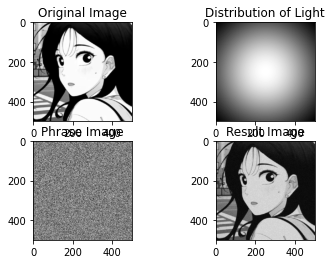

In [5]:
bar = tqdm(total=100, desc='Iterating...', bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}{postfix}]')

ratio = 3

x = ((np.arange(1,xy_range+1)) - (1+xy_range) / 2) /ratio
y = x 
xx, yy = np.meshgrid(x, y)
r = np.sqrt(xx**2 + yy**2)

omega_0 = 100
U_0 = np.exp(-(r/omega_0)**2)

rand_matrix = np.exp(2j * np.pi * np.random.rand(xy_range, xy_range))
img_initial = img_original* rand_matrix

phrase_input, img_output = GS_steps(img_initial,U_0)
img_figure = img_normalization(img_output)
value_sim = img_sim(img_figure, img_original)
str_value_sim = f'Iterating...{value_sim:.4f}'
bar.set_postfix_str(str_value_sim)
i = 0

while value_sim < 0.995:
    phrase_output = np.angle(img_output)
    img_initial = img_original * np.exp(1j * phrase_output)
    phrase_input, img_output = GS_steps(img_initial, U_0)
    img_figure = img_normalization(img_output)
    value_sim = img_sim(img_figure, img_original)
    i += 1
    str_value_sim = f'Iterating...{value_sim:.4f}'
    bar.set_postfix_str(str_value_sim)
    bar.update(1)

bar.close()

plt.figure(1)
plt.subplot(2, 2, 1)
plt.imshow(np.real(img_original), cmap='gray')
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.imshow(U_0, cmap='gray')
plt.title('Distribution of Light')
plt.subplot(2, 2, 3)
plt.imshow(phrase_input, cmap='gray')
plt.title('Phrase Image')
plt.subplot(2, 2, 4)
plt.imshow(img_figure, cmap='gray')
plt.title('Result Image')
plt.show()


绘制在z=400微米处，形成的图像

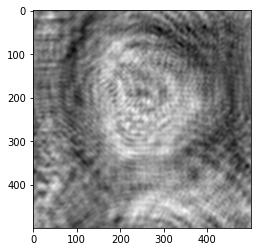

In [6]:
wavelength = 0.632
z = 400
k = 2*np.pi/wavelength
img_output = diffrac(k,z, 1, xy_range,xx,yy,img_figure)
plt.imshow(np.real(img_output), cmap='gray')


(1)当全息片的像素单元尺寸为2μm*2μm时的位相分布,dx=dy=2,ratio=0.5

Iterating...: |          | 4221/? [07:24<00:00,  9.49it/s, Iterating...0.9750]     


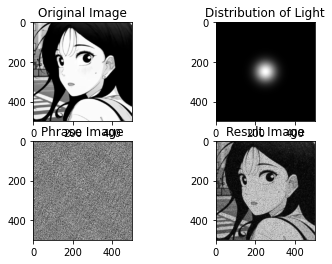

In [7]:
bar = tqdm(total=100, desc='Iterating...', bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}{postfix}]')

ratio = 0.5

x = ((np.arange(1,xy_range+1)) - (1+xy_range) / 2) /ratio
y = x 
xx, yy = np.meshgrid(x, y)
r = np.sqrt(xx**2 + yy**2)

omega_0 = 100
U_0 = np.exp(-(r/omega_0)**2)

rand_matrix = np.exp(2j * np.pi * np.random.rand(xy_range, xy_range))
img_initial = img_original* rand_matrix

phrase_input, img_output = GS_steps(img_initial,U_0)
img_figure = img_normalization(img_output)
value_sim = img_sim(img_figure, img_original)
str_value_sim = f'Iterating...{value_sim:.4f}'
bar.set_postfix_str(str_value_sim)
i = 0

while value_sim < 0.975:
    phrase_output = np.angle(img_output)
    img_initial = img_original * np.exp(1j * phrase_output)
    phrase_input, img_output = GS_steps(img_initial, U_0)
    img_figure = img_normalization(img_output)
    value_sim = img_sim(img_figure, img_original)
    i += 1
    str_value_sim = f'Iterating...{value_sim:.4f}'
    bar.set_postfix_str(str_value_sim)
    bar.update(1)

bar.close()

plt.figure(1)
plt.subplot(2, 2, 1)
plt.imshow(np.real(img_original), cmap='gray')
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.imshow(U_0, cmap='gray')
plt.title('Distribution of Light')
plt.subplot(2, 2, 3)
plt.imshow(phrase_input, cmap='gray')
plt.title('Phrase Image')
plt.subplot(2, 2, 4)
plt.imshow(img_figure, cmap='gray')
plt.title('Result Image')
plt.show()


绘制在z=400微米处，形成的图像

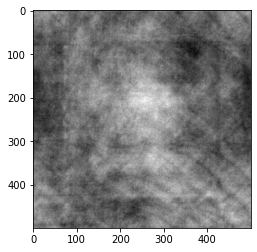

In [8]:
wavelength = 0.632
z = 400
k = 2*np.pi/wavelength
img_output = diffrac(k,z, 1, xy_range,xx,yy,img_figure)
plt.imshow(np.real(img_output), cmap='gray')

发现，像素的大小不同最终取得相同精度的迭代时间也不同，可以看出像素点取大时保真度也会变差。（第二种情形在0.995精度下跑了很久没跑出来，感觉上限在0.9764左右，因此取迭代结束的精度为0.975）